## Let's import all the necessary Libraries required for Data Wrangling, Analysis and Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

### IMPROTING DATASET - PIMA INDIANS DIABETES DATASET


In [2]:
df = pd.read_csv("/Users/ishaasamyuktha/Desktop/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### DATA WRANGLING

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Finding Null/NaN values...

In [5]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Here we can see that there is no null values but many columns in the data have zero values indicating missing values.**

In [6]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

**The correlation also tells us to find if any of the attributes contribute positively or negatively towards the diabetes. It utilizes the Pearson Coefficient.**

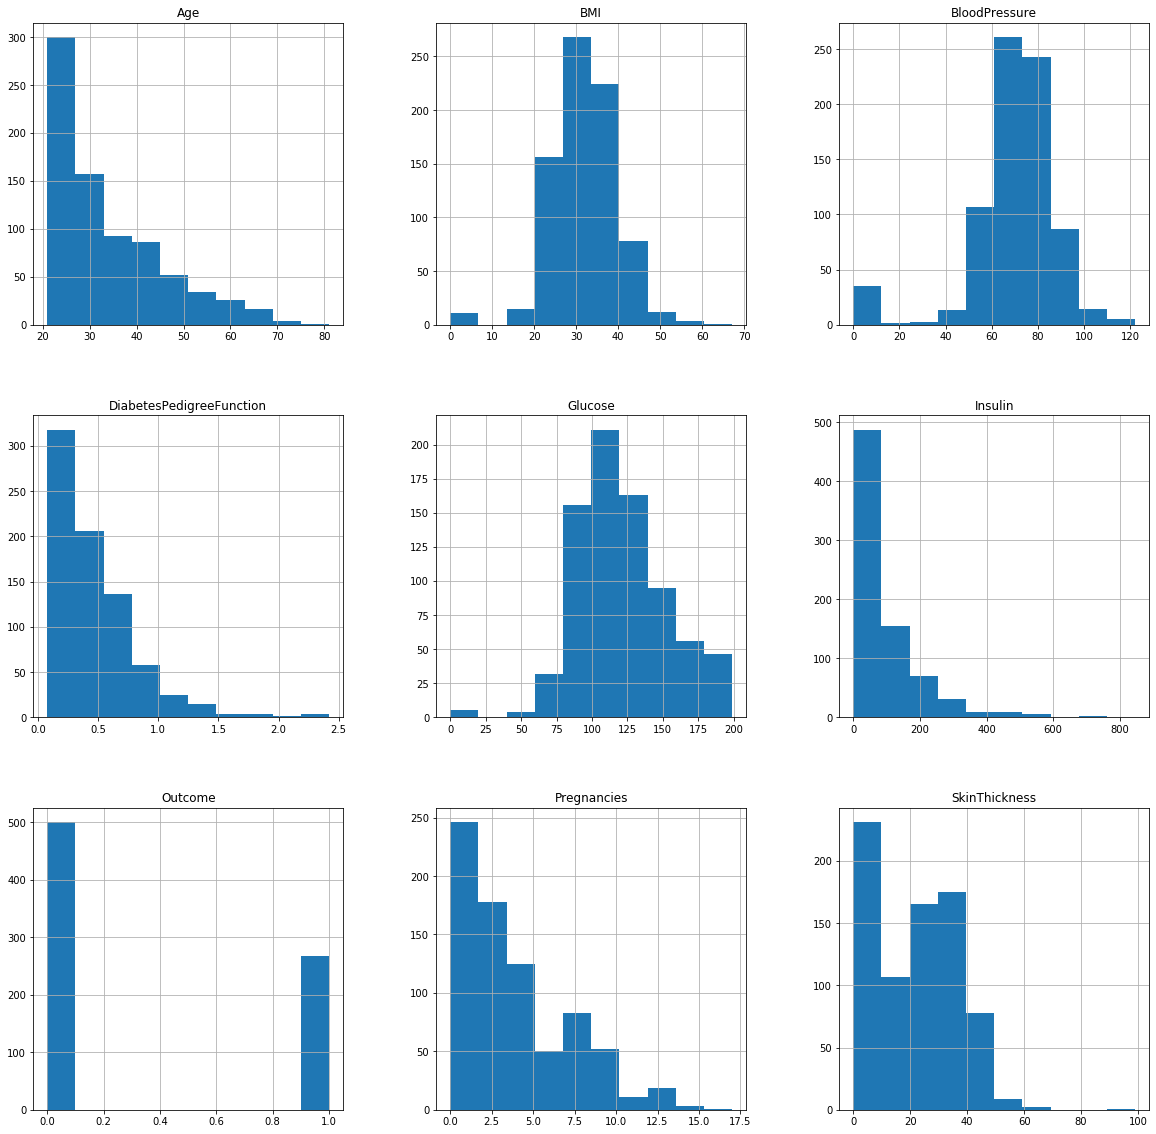

In [7]:
his = df.hist(figsize = (20,20))

### Histogram Plot

**Histogram gives us the frequency of occurrence per value in the dataset. The distribution does not occur as a bell curve in all attributes therefore, the signal is not normally distributed.**

**The Histogram appears Skewed and major values of 'Insulin', 'BMI', 'Glucose','Blood Pressure ', 'Skin thickness' appears zero is visualized here**

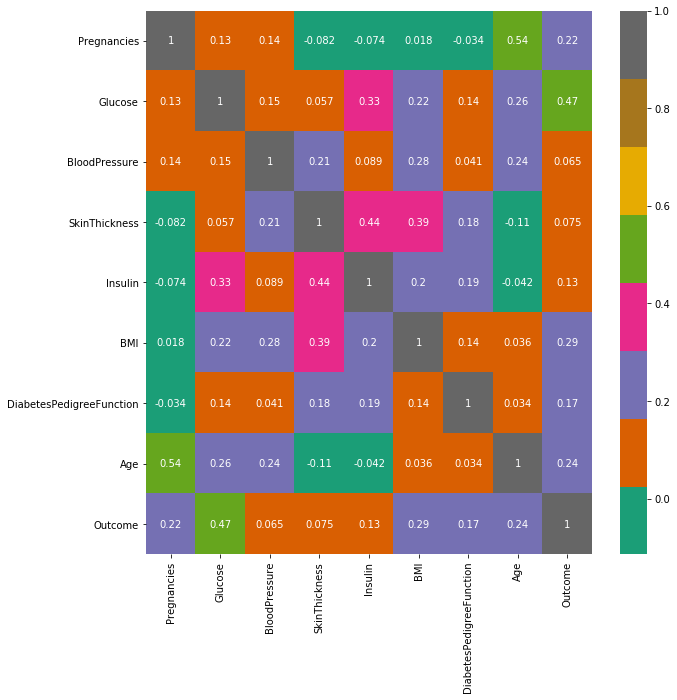

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Dark2", annot= True,)
plt.show()

### IDENTIFYING AND REPLACING THE NULL VALUES

**Replacing the zero values to NaN and evaluating the null values in the attributes obtained**

In [9]:
df1 = df.copy(deep = True)
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df1.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### IMPUTATION

**Imputing the Median values in the place of null values to obatin proper value distribution. Imputing can be done in both mean and median values. But since the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable**

In [10]:
df1['Glucose'].fillna(df1['Glucose'].median(), inplace = True)
df1['BloodPressure'].fillna(df1['BloodPressure'].median(), inplace = True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace = True)
df1['BMI'].fillna(df1['BMI'].median(), inplace = True)

**Again plotting the Histogram and Correlation plot after the imputation of data to see the variation**



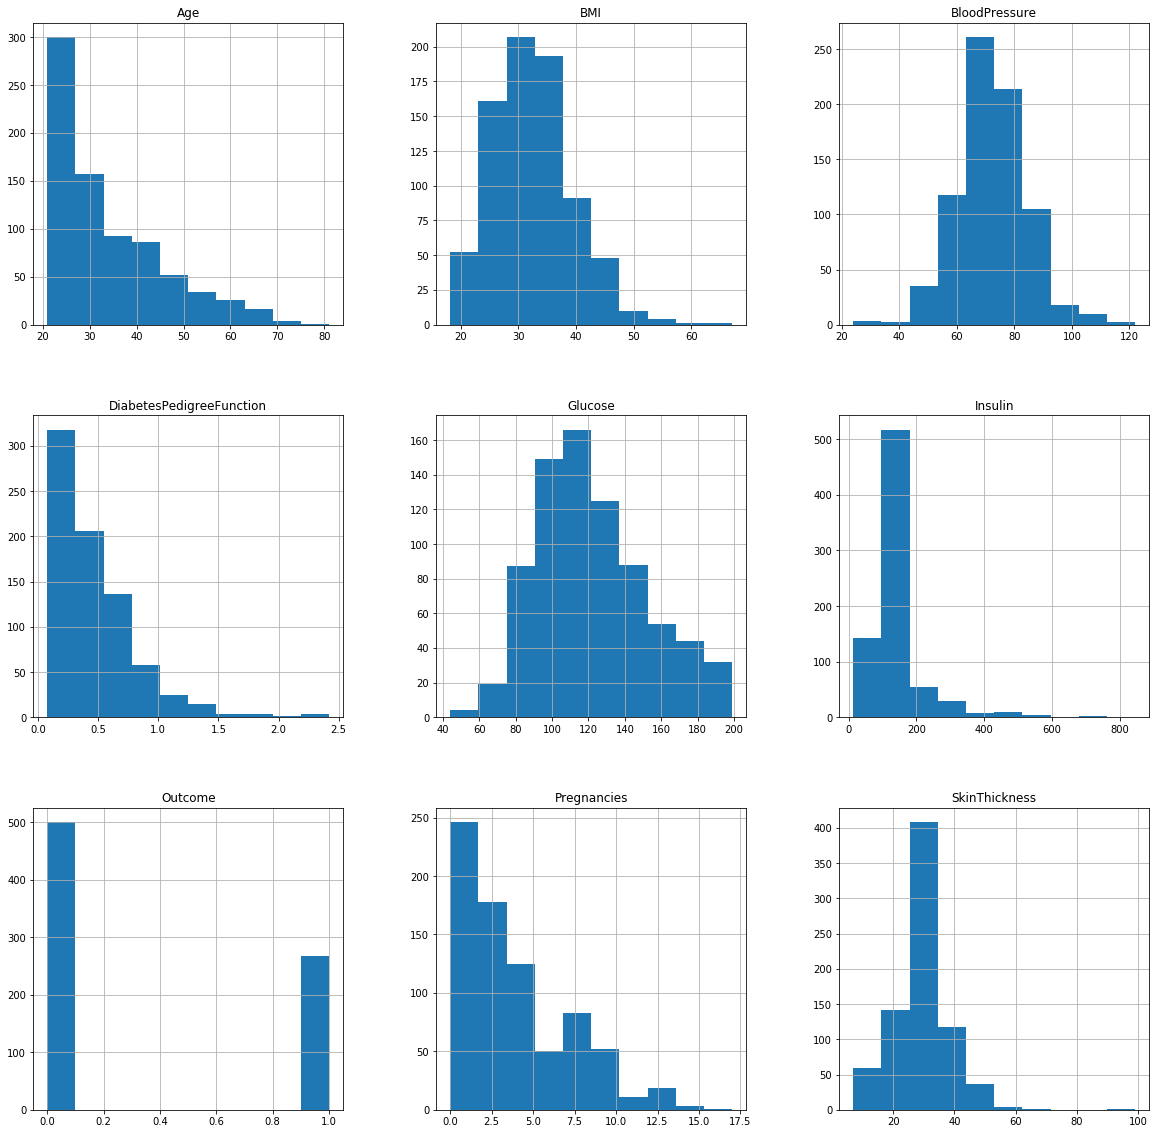

In [11]:
his1 = df1.hist(figsize = (20,20))

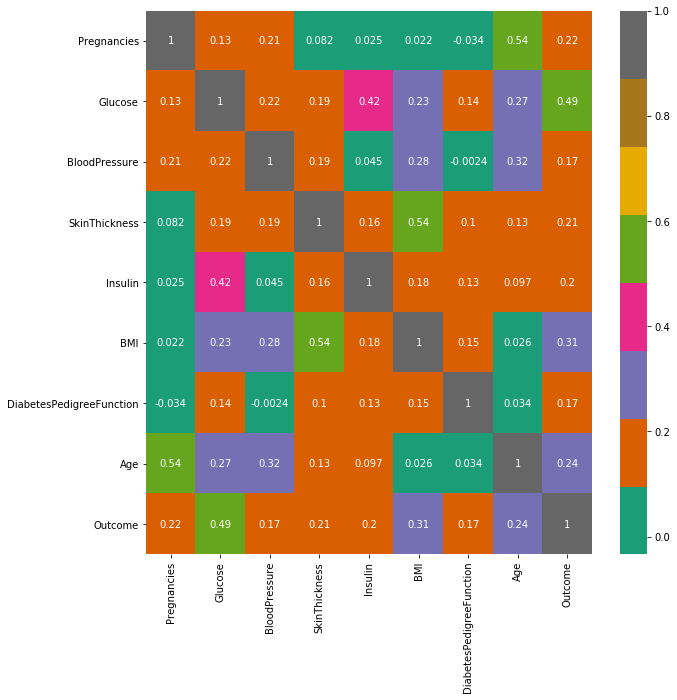

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="Dark2", annot= True,)
plt.show()

In [13]:
df1.corr()['Outcome'].sort_values()

BloodPressure               0.165723
DiabetesPedigreeFunction    0.173844
Insulin                     0.203790
SkinThickness               0.214873
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.312038
Glucose                     0.492782
Outcome                     1.000000
Name: Outcome, dtype: float64

## DATA ANALYSIS


### DATA ANALYSIS AND VISUALIZATION

Pairplot helps us to identify the relation between the attributes how one of them influces the other.

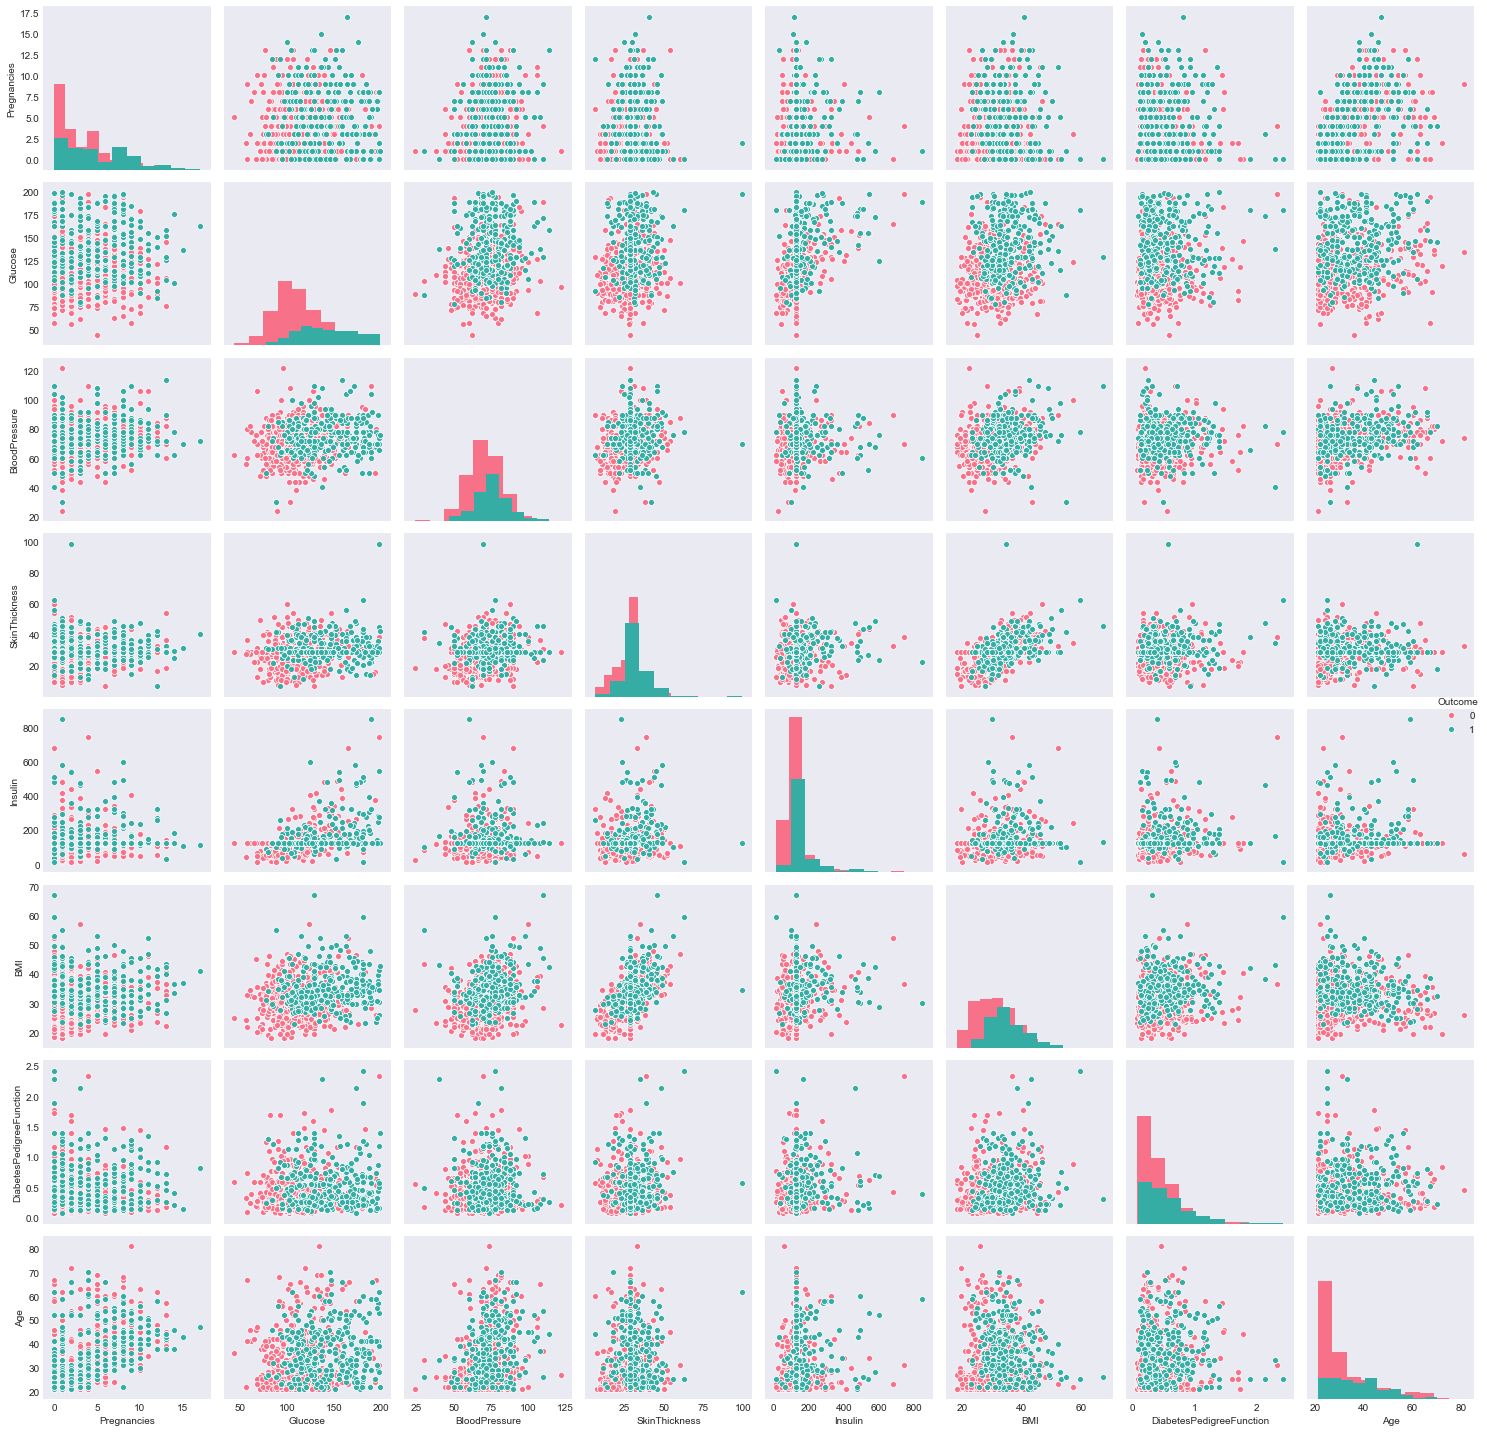

In [14]:
plt.style.use('seaborn-dark')
sns.pairplot(df1,hue='Outcome', palette='husl', diag_kind="hist");
plt.tight_layout()

### DATA VIZUALISATION AND INTERPRETATION

**First we find the number of diabetic and non-diabetic patients. Followed by range in which diabetes occur e.g. what are possible age group or glucose level are more susceptible to diabetes**

In [15]:
df1['Outcome'].value_counts().to_frame()

,Outcome
0,500
1,268


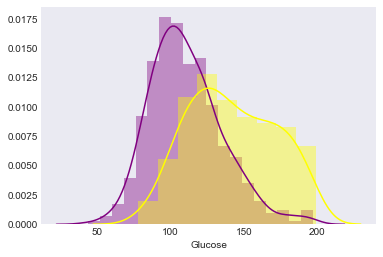

In [16]:
sns.distplot(df1[df1['Outcome'] == 0]["Glucose"],color='purple' ) # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["Glucose"], color='yellow') # Diabetic - yellow

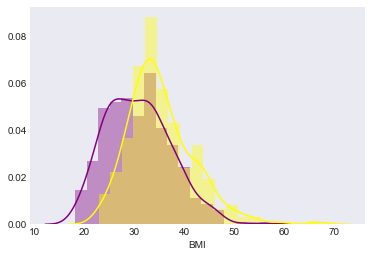

In [17]:
sns.distplot(df1[df1['Outcome'] == 0]["BMI"], color='purple') # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["BMI"], color='yellow') # Diabetic - yellow


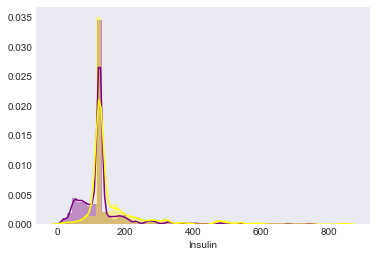

In [18]:
sns.distplot(df1[df1['Outcome'] == 0]["Insulin"], color='purple') # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["Insulin"], color='yellow') # Diabetic - yellow


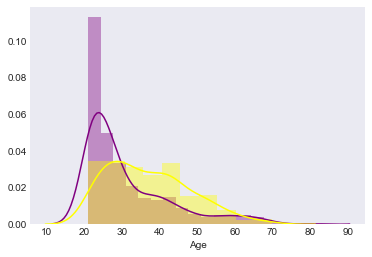

In [19]:
sns.distplot(df1[df1['Outcome'] == 0]["Age"], color='purple') # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["Age"], color='yellow') # Diabetic - yellow


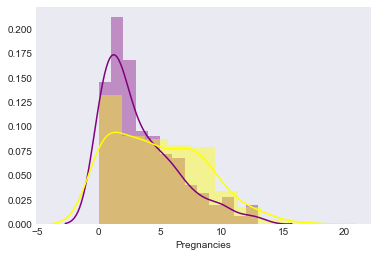

In [20]:
sns.distplot(df1[df1['Outcome'] == 0]["Pregnancies"], color='purple') # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["Pregnancies"], color='yellow') # Diabetic - yellow


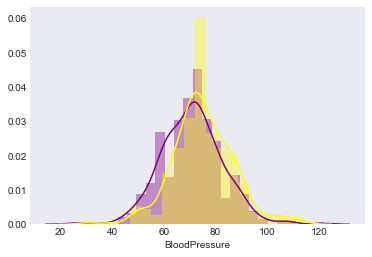

In [21]:
sns.distplot(df1[df1['Outcome'] == 0]["BloodPressure"], color='purple') # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["BloodPressure"], color='yellow') # Diabetic - yellow

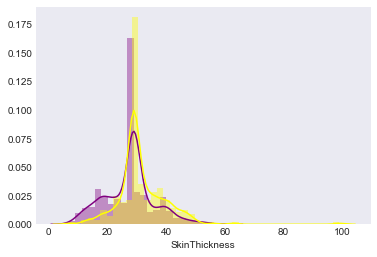

In [22]:
sns.distplot(df1[df1['Outcome'] == 0]["SkinThickness"], color='purple') # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["SkinThickness"], color='yellow') # Diabetic - yellow


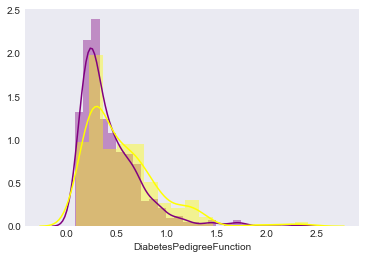

In [23]:
sns.distplot(df1[df1['Outcome'] == 0]["DiabetesPedigreeFunction"], color='purple') # Healthy - purple
sns.distplot(df1[df1['Outcome'] == 1]["DiabetesPedigreeFunction"], color='yellow') # Diabetic - yellow

### Interpretation of the Data Analysis

**Glucose:** Diabetic range occurs when the glucose levels at 75 mg/dl and reaches a peak at ~ 125mg/dl the data sampled. And a standard high levels of 145mg/dl glucose is observed in diabetes patients compared to the normal. Since the glucose represents the plasma glucose concentration a 2 hours in an oral glucose tolerance test. Values less than 140mg/dl are considered normal. Glucose range over 145mg/dl in the popluation sampled indicates the presence of diabetes.

**BMI:** The normal BMI range for an healthy adult is between 18.5 to 24.9. Keeping that in mind we can see that the Diabetic population has BMI range from 22 to 50, Highest number no people having ~32 BMI (30-40 BMI has higher diabetes). hence we can conclude that Obesity being a major factor.

**Insulin:** The insulin value given in dataset is 2-Hour serum insulin (mu U/ml). We can see that even though the healthy individuals as well as diabetic both have crossover and have sharp decrease after 200 mu U/ml, Diabetic patient have a sharp peak between (~ 160 -180)mu U/ml range.

**Age:** The ages between 40 to 45 years have higher chances of diabetes even though the curve starts from the age of 20 and slowly drops after the 46-47 years of age. This indicates the sedentary lifestyle and well as the living conditions are a major reason foe diabetes more than the age attribute.

**Pregnancies:** Even though women having no kids equally had a higher chance of diabetes, many of them remained healthy also. So we can conclude that pregnancy may not be a pri e factor to consider.

**Blood Pressure:** The peak values for the diabetic patients occurs at ~72 to 76 mm Hg and the range of diabetic range falls between 62 to 95 mm Hg while healthy people have till 80 mmHg

**Skin Thickness aqnd Diabetes Pedigree function (DPF):** We can see that the healthy and diabetic samples have similar skin thickness (Triceps skin fold thickness (mm)) range the highest being 32mm and similarly the overall mean curve of the DPF is higher for healthy compared to the diabetic. Thus these two factors dont play a greater role in predicting diabetes.

## MACHINE LEARNING MODELS USING HYPER PARAMETER TUNING


**Hyper parameter tuning is done to increase accuracy with the limited data. The following classifiers are tunes based on the estimators obtained.**

1. K- NEAREST NEIGHBOR
2. LOGISTIC REGRESSION
3. RANDOM FOREST

We are now trying to predict and find accuracy for all Data Attributes



## ACURACY AND OTHER METRICS TABLE


**Accuracy:** Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy is a great measure but only for symmetric datasets where values of false positive and false negatives are almost same. Therefore, other parameters are estimated to evaluate the performance of your model.

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

**Recall:** Recall is the ratio of correctly predicted positive observations to the all observations in actual class

**F1 Score:** F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if the dataset has an uneven class distribution. Hence F1 score is calculated here

**Jaccard Index:** The Jaccard similarity index compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%.

**Cohen’s Kappa:** Cohen’s kappa statistic measures interrater reliability (sometimes called interobserver agreement). Interrater reliability, or precision, happens when your data raters (or collectors) give the same score to the same data item. 0 = agreement equivalent to chance. 0.1 – 0.20 = slight agreement. 0.21 – 0.40 = fair agreement. 0.41 – 0.60 = moderate agreement. 0.61 – 0.80 = substantial agreement. 0.81 – 0.99 = near perfect agreement 1 = perfect agreement.

**ROC - AUC:** AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

**Confusion Matrix:** A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

**LogLoss:** Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. A perfect model would have a log loss of 0.


In [24]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [25]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [26]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [27]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 4)
# Scaling to bring values to the same range
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


In [28]:
########################################### KNN MODEL ############################################################
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68831169, 0.70562771, 0.72294372, 0.75324675, 0.77056277,
       0.77922078, 0.76190476, 0.77489177, 0.77489177])

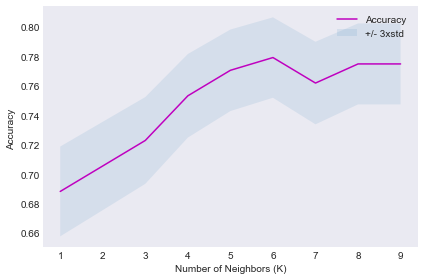

In [29]:
plt.plot(range(1,Ks),mean_acc,'m')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [30]:
# build model with best accuracy, K=7
knn_model = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)
yhat = knn_model.predict(x_test)
mean = metrics.accuracy_score(y_test, yhat)
mean

0.7792207792207793

roc_auc_score:  0.7532061958694204


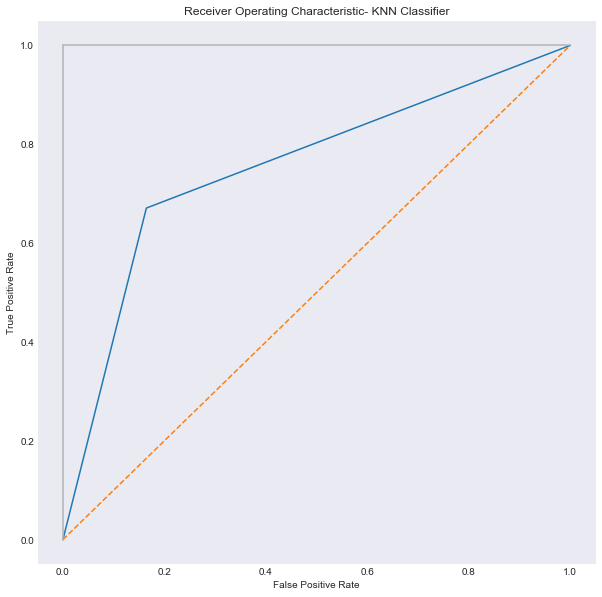

In [31]:
# Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat)
print('roc_auc_score: ', roc_auc_score(y_test, yhat))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic- KNN Classifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Confusion matrix-KNN Classifier
[[127  25]
 [ 26  53]]
Normalized confusion matrix
[[0.83552632 0.16447368]
 [0.32911392 0.67088608]]


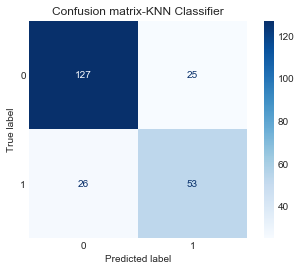

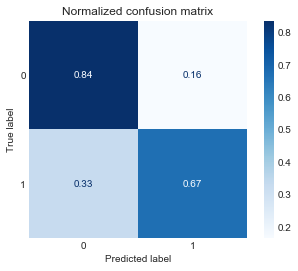

In [32]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix-KNN Classifier", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [33]:
######################################################## LOGISTIC REGRESSION ##################################################

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularisations = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
solver_mean_acc = {}
solver_std_acc = {}
solver_best_reg = {}
for solver in solvers:
    best_mean = 0
    best_std = 0
    best_reg = 0
    for reg in regularisations:
        lr = LogisticRegression(C=reg, solver=solver).fit(x_train, y_train)
        yhat = lr.predict(x_test)
        mean = metrics.accuracy_score(y_test, yhat)
        std = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
        if mean > best_mean:
            best_mean = mean
            best_std = std
            best_reg = reg
    solver_mean_acc[solver] = best_mean
    solver_std_acc[solver] = best_std
    solver_best_reg[solver] = best_reg

solver_mean_acc

{'newton-cg': 0.8181818181818182,
 'lbfgs': 0.8181818181818182,
 'liblinear': 0.8051948051948052,
 'sag': 0.8181818181818182,
 'saga': 0.8181818181818182}

In [34]:
solver_best_reg

{'newton-cg': 0.01, 'lbfgs': 0.01, 'liblinear': 1, 'sag': 0.01, 'saga': 0.01}

In [35]:
lr_model = LogisticRegression(C=1, solver='liblinear', max_iter=200).fit(x_train, y_train)
yhat = lr_model.predict(x_test)
mean = metrics.accuracy_score(y_test, yhat)
mean

0.8051948051948052

roc_auc_score:  0.7668637574950034


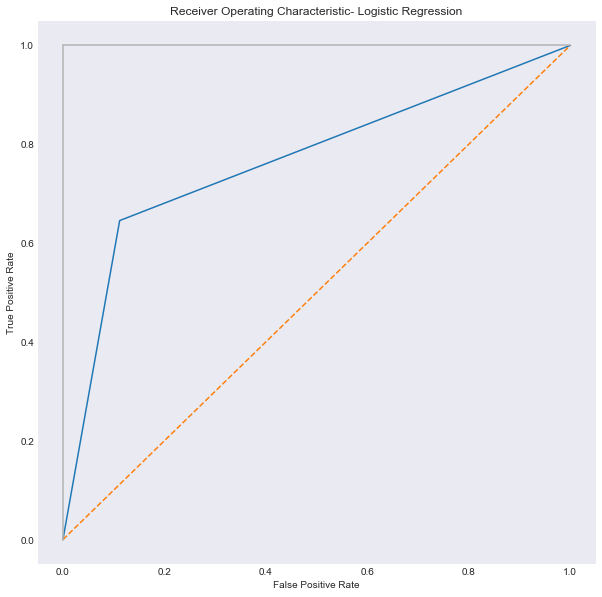

In [36]:
# Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat)
print('roc_auc_score: ', roc_auc_score(y_test, yhat))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic- Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix- Logistic Regression
[[135  17]
 [ 28  51]]
Normalized confusion matrix
[[0.88815789 0.11184211]
 [0.35443038 0.64556962]]


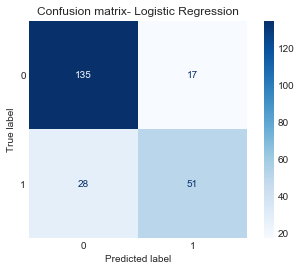

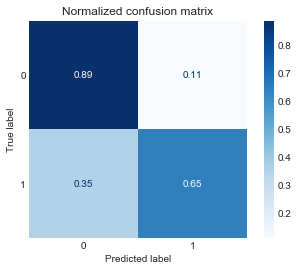

In [37]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix- Logistic Regression", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr_model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [38]:
############################################### RANDOM FOREST ##################################################################
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [40]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [41]:
def evaluate(model, x_test, y_test):
    yhat = model.predict(x_test)
   # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat.round())
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat.round())
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat.round())
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat.round(),'weighted')
    print('F1 score: %f' % f1)
    # Jaccard Index
    jaccard=jaccard_score(y_test, yhat.round(),'weighted')
    print('Jaccard: %f' % jaccard)
    # kappa
    kappa = cohen_kappa_score(y_test, yhat.round())
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, yhat.round())
    print('ROC AUC: %f' % auc)
    # confusion matrix
    matrix = confusion_matrix(y_test, yhat.round())
    print(matrix)
    
    return accuracy,precision,recall,f1,jaccard,kappa,auc,matrix

roc_auc_score:  0.7668637574950034


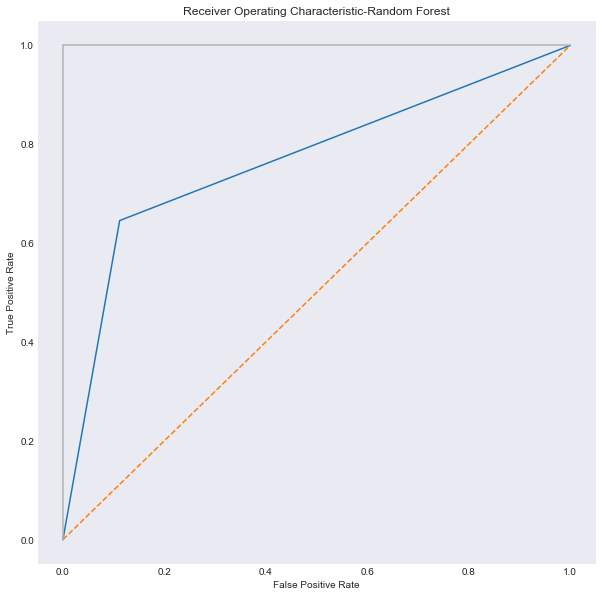

In [42]:
# Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat)
print('roc_auc_score: ', roc_auc_score(y_test, yhat))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic-Random Forest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Confusion matrix- Random Forest
[[130  22]
 [ 24  55]]
Normalized confusion matrix
[[130  22]
 [ 24  55]]


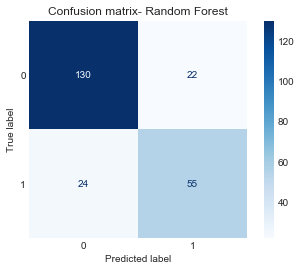

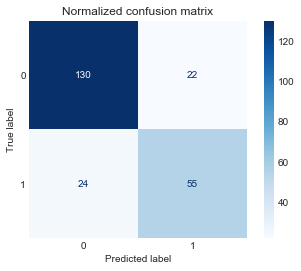

In [43]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix- Random Forest", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_random, x_test, y_test,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [44]:
df2 = pd.DataFrame(index=['KNN','Logistic Regression','Random Forest', ], 
                  columns=['Accuracy','Precision','Recall','Kappa','Jaccard', 'F1-score', 'ROC','Confusion Matrix', 'LogLoss'])

# -------------------------------------------TABLE CREATION--------------------------------------------------------

# -------------------------------------------------KNN----------------------------------------------------------------
yhat = knn_model.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)

df2.loc['KNN'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix, np.nan]



# ----------------------------------------------------LOGISTIC REGRESSION ---------------------------------------------------------

yhat = lr_model.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
yhat_prob = lr_model.predict_proba(x_test)
ll = log_loss(y_test, yhat_prob)
df2.loc['Logistic Regression'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,ll]

# ----------------------------------------------------- RANDOM FOREST ---------------------------------------------------------
yhat = rf_random.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
df2.loc['Random Forest'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,np.nan]




Accuracy: 0.779221
Precision: 0.679487
Recall: 0.670886
F1 score: 0.675159
Jaccard: 0.509615
Cohens kappa: 0.507956
ROC AUC: 0.753206
[[127  25]
 [ 26  53]]
Accuracy: 0.805195
Precision: 0.750000
Recall: 0.645570
F1 score: 0.693878
Jaccard: 0.531250
Cohens kappa: 0.552191
ROC AUC: 0.766864
[[135  17]
 [ 28  51]]
Accuracy: 0.800866
Precision: 0.714286
Recall: 0.696203
F1 score: 0.705128
Jaccard: 0.544554
Cohens kappa: 0.554839
ROC AUC: 0.775733
[[130  22]
 [ 24  55]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positiona

In [45]:
df2

,Accuracy,Precision,Recall,Kappa,Jaccard,F1-score,ROC,Confusion Matrix,LogLoss
KNN,0.779221,0.679487,0.670886,0.507956,0.509615,0.675159,0.753206,"[[127, 25], [26, 53]]",NaN
Logistic Regression,0.805195,0.75,0.64557,0.552191,0.53125,0.693878,0.766864,"[[135, 17], [28, 51]]",0.436264
Random Forest,0.800866,0.714286,0.696203,0.554839,0.544554,0.705128,0.775733,"[[130, 22], [24, 55]]",NaN


### ML MODELS FOR SELECTED ATTRIBUTES

Here we have excluded the attributes Age, Pregnancy, Diabetes Pedigree Function and Skin Thickness as these do not contribute much to the detecting Diabetes from our analysis.

Let's see how the accuracy varies from the previous models.

In [46]:
data = df1.copy(deep = True)
data.drop(data.columns[[ 0 , 3 , 6 , 7 ]], axis = 1 , inplace = True )
data.head()

,Glucose,BloodPressure,Insulin,BMI,Outcome
0,148.0,72.0,125.0,33.6,1
1,85.0,66.0,125.0,26.6,0
2,183.0,64.0,125.0,23.3,1
3,89.0,66.0,94.0,28.1,0
4,137.0,40.0,168.0,43.1,1


In [47]:
x1 = data.iloc[:, :-1].values
y1 = data.iloc[:, -1].values

In [48]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 4)
# Scaling to bring values to the same range
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (537, 4) (537,)
Test set: (231, 4) (231,)


In [49]:
########################################### KNN MODEL ############################################################
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7012987 , 0.71861472, 0.74025974, 0.75757576, 0.77489177,
       0.78787879, 0.79220779, 0.8008658 , 0.7965368 ])

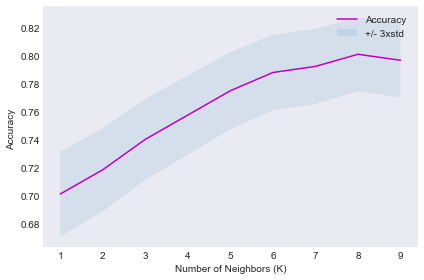

In [50]:
plt.plot(range(1,Ks),mean_acc,'m')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [51]:
# build model with best accuracy, K=6
knn_model = KNeighborsClassifier(n_neighbors=8).fit(x_train, y_train)
yhat = knn_model.predict(x_test)
mean = metrics.accuracy_score(y_test, yhat)
mean

0.8008658008658008

In [52]:
######################################################## LOGISTIC REGRESSION ##################################################

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularisations = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
solver_mean_acc = {}
solver_std_acc = {}
solver_best_reg = {}
for solver in solvers:
    best_mean = 0
    best_std = 0
    best_reg = 0
    for reg in regularisations:
        lr = LogisticRegression(C=reg, solver=solver).fit(x_train, y_train)
        yhat = lr.predict(x_test)
        mean = metrics.accuracy_score(y_test, yhat)
        std = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
        if mean > best_mean:
            best_mean = mean
            best_std = std
            best_reg = reg
    solver_mean_acc[solver] = best_mean
    solver_std_acc[solver] = best_std
    solver_best_reg[solver] = best_reg

solver_mean_acc

{'newton-cg': 0.8051948051948052,
 'lbfgs': 0.8051948051948052,
 'liblinear': 0.7965367965367965,
 'sag': 0.8051948051948052,
 'saga': 0.8051948051948052}

In [53]:
solver_best_reg

{'newton-cg': 0.3, 'lbfgs': 0.3, 'liblinear': 1, 'sag': 0.3, 'saga': 0.3}

In [54]:
lr_model = LogisticRegression(C=0.3, solver='saga', max_iter=200).fit(x_train, y_train)
yhat = lr_model.predict(x_test)
mean = metrics.accuracy_score(y_test, yhat)
mean

0.8051948051948052

In [55]:
############################################### RANDOM FOREST ##################################################################
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [58]:
def evaluate(model, x_test, y_test):
    yhat = model.predict(x_test)
   # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat.round())
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat.round())
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat.round())
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat.round(),'weighted')
    print('F1 score: %f' % f1)
    # Jaccard Index
    jaccard=jaccard_score(y_test, yhat.round(),'weighted')
    print('Jaccard: %f' % jaccard)
    # kappa
    kappa = cohen_kappa_score(y_test, yhat.round())
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, yhat.round())
    print('ROC AUC: %f' % auc)
    # confusion matrix
    matrix = confusion_matrix(y_test, yhat.round())
    print(matrix)
    
    return accuracy,precision,recall,f1,jaccard,kappa,auc,matrix

In [59]:
df3 = pd.DataFrame(index=['KNN','Logistic Regression','Random Forest', ], 
                  columns=['Accuracy','Precision','Recall','Kappa','Jaccard', 'F1-score', 'ROC','Confusion Matrix', 'LogLoss'])

# -------------------------------------------TABLE CREATION--------------------------------------------------------

# -------------------------------------------------KNN----------------------------------------------------------------
yhat = knn_model.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)

df3.loc['KNN'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix, np.nan]



# ----------------------------------------------------LOGISTIC REGRESSION ---------------------------------------------------------

yhat = lr_model.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
yhat_prob = lr_model.predict_proba(x_test)
ll = log_loss(y_test, yhat_prob)
df3.loc['Logistic Regression'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,ll]

# ----------------------------------------------------- RANDOM FOREST ---------------------------------------------------------
yhat = rf_random.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
df3.loc['Random Forest'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,np.nan]


Accuracy: 0.800866
Precision: 0.746269
Recall: 0.632911
F1 score: 0.684932
Jaccard: 0.520833
Cohens kappa: 0.540795
ROC AUC: 0.760535
[[135  17]
 [ 29  50]]
Accuracy: 0.805195
Precision: 0.750000
Recall: 0.645570
F1 score: 0.693878
Jaccard: 0.531250
Cohens kappa: 0.552191
ROC AUC: 0.766864
[[135  17]
 [ 28  51]]
Accuracy: 0.770563
Precision: 0.675676
Recall: 0.632911
F1 score: 0.653595
Jaccard: 0.485437
Cohens kappa: 0.482347
ROC AUC: 0.737508
[[128  24]
 [ 29  50]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=weighted as keyword args. From version 1.0 (renaming of 0.25) passing these as positiona

In [60]:
df3

,Accuracy,Precision,Recall,Kappa,Jaccard,F1-score,ROC,Confusion Matrix,LogLoss
KNN,0.800866,0.746269,0.632911,0.540795,0.520833,0.684932,0.760535,"[[135, 17], [29, 50]]",NaN
Logistic Regression,0.805195,0.75,0.64557,0.552191,0.53125,0.693878,0.766864,"[[135, 17], [28, 51]]",0.447006
Random Forest,0.770563,0.675676,0.632911,0.482347,0.485437,0.653595,0.737508,"[[128, 24], [29, 50]]",NaN


In [61]:
df2

,Accuracy,Precision,Recall,Kappa,Jaccard,F1-score,ROC,Confusion Matrix,LogLoss
KNN,0.779221,0.679487,0.670886,0.507956,0.509615,0.675159,0.753206,"[[127, 25], [26, 53]]",NaN
Logistic Regression,0.805195,0.75,0.64557,0.552191,0.53125,0.693878,0.766864,"[[135, 17], [28, 51]]",0.436264
Random Forest,0.800866,0.714286,0.696203,0.554839,0.544554,0.705128,0.775733,"[[130, 22], [24, 55]]",NaN


**Here we can see that the accuracy difference between all the attributes and the ones with the selected attributes as displayed in the table shown in df3 and df2**